In [1]:
import scipy as sc
import pandas as pd
from seaborn import scatterplot,pointplot
import matplotlib.pyplot as plt
import re
import math
from sklearn.linear_model import LinearRegression
from io import StringIO

In [2]:
class ProjectileData:
    def __init__(self,file_name):
        self.pj_data = pd.DataFrame(columns=['Run','File_name','Velocity','Flight_time'])
        self.add(file_name)
    
    def add(self,file_name):
        runs = []
        velocities = []
        flight_times = []
        file_names = []
        with open(file_name,'r') as f:
            run_str = ''
            velocity = None
            flight_time = None
            start_read = False
            end_read = False
            for line in f:
                if line == '\n':
                    continue
                if line.startswith('Vernier') and start_read:
                    end_read = True
                    if flight_time > 2.0 or flight_time < 0.5:
                        run_str = ''
                        velocity = None
                        flight_time = None
                        start_read = False
                        continue
                    runs.append(run_str)
                    velocities.append(velocity)
                    flight_times.append(flight_time)
                    file_names.append(file_name)
                    run_str = ''
                    velocity = None
                    flight_time = None
                    start_read = False
                    continue
                if line.startswith('Run'):
                    run_str = line.rstrip('\n')
                    start_read = True
                    end_read = False
                    continue
                if start_read and not end_read:
                    if line.isspace():
                        continue
                    if line.startswith('Time') or line.startswith('T') or line.startswith('s'):
                        continue
                    tmp_line = line.rstrip('\t\n')
                    if len(tmp_line.split('\t')) == 4 and velocity is None:
                        velocity = float(tmp_line.split('\t')[3])
                        continue
                    if velocity is not None:
                        flight_time = float(line.split('\t')[0])
                        
        data = pd.DataFrame()
        data['Run'] = runs
        data['File_name'] = file_names
        data['Velocity'] = velocities
        data['Flight_time'] = flight_times
        self.pj_data = pd.concat([self.pj_data,data])


In [3]:
pj = ProjectileData('Launch_Data_Back_Group.txt')

In [4]:
print(pj.pj_data)

       Run                   File_name  Velocity  Flight_time
0    Run 2  Launch_Data_Back_Group.txt     5.147      1.45177
1    Run 3  Launch_Data_Back_Group.txt     4.964      1.44735
2    Run 4  Launch_Data_Back_Group.txt     4.924      1.44601
3    Run 5  Launch_Data_Back_Group.txt     5.103      1.44589
4    Run 6  Launch_Data_Back_Group.txt     5.100      1.44618
5    Run 7  Launch_Data_Back_Group.txt     5.046      1.44627
6    Run 8  Launch_Data_Back_Group.txt     4.509      1.44479
7    Run 9  Launch_Data_Back_Group.txt     4.560      1.44456
8   Run 10  Launch_Data_Back_Group.txt     4.394      1.44640
9   Run 11  Launch_Data_Back_Group.txt     4.695      1.44680
10  Run 12  Launch_Data_Back_Group.txt     4.717      1.44589
11  Run 13  Launch_Data_Back_Group.txt     4.650      1.44369
12  Run 14  Launch_Data_Back_Group.txt     5.536      1.44625


In [5]:
pj2 = ProjectileData('Launch_Data_Front_Group.txt')

In [6]:
print(pj2.pj_data)

       Run                    File_name  Velocity  Flight_time
0    Run 1  Launch_Data_Front_Group.txt     5.863      1.46139
1    Run 2  Launch_Data_Front_Group.txt     5.879      1.46153
2    Run 3  Launch_Data_Front_Group.txt     6.004      1.46192
3    Run 4  Launch_Data_Front_Group.txt     6.027      1.46063
4    Run 5  Launch_Data_Front_Group.txt     6.050      1.46155
5    Run 6  Launch_Data_Front_Group.txt     6.034      1.46069
6    Run 8  Launch_Data_Front_Group.txt     6.332      1.46021
7   Run 11  Launch_Data_Front_Group.txt     5.597      1.45836
8   Run 12  Launch_Data_Front_Group.txt     4.229      1.45286
9   Run 13  Launch_Data_Front_Group.txt     4.076      1.45257
10  Run 14  Launch_Data_Front_Group.txt     4.057      1.45258


In [7]:
mean_flight_time = pj.pj_data['Flight_time'].mean()
std_flight_time = pj.pj_data['Flight_time'].std()
flight_time_err = std_flight_time/math.sqrt(len(pj.pj_data))
print(mean_flight_time,std_flight_time/math.sqrt(len(pj.pj_data)))

pj.pj_data['Range'] = pj.pj_data['Velocity']*pj.pj_data['Flight_time']
pj.pj_data['Range_error'] = std_flight_time/math.sqrt(len(pj.pj_data))/mean_flight_time*pj.pj_data['Range']

mean_flight_time2 = pj2.pj_data['Flight_time'].mean()
std_flight_time2 = pj2.pj_data['Flight_time'].std()
flight_time_err2 = std_flight_time2/math.sqrt(len(pj2.pj_data))
print(mean_flight_time2,std_flight_time2/math.sqrt(len(pj2.pj_data)))

pj2.pj_data['Range'] = pj2.pj_data['Velocity']*pj2.pj_data['Flight_time']
pj2.pj_data['Range_error'] = std_flight_time2/math.sqrt(len(pj2.pj_data))/mean_flight_time2*pj2.pj_data['Range']

1.4462961538461536 0.0005301252131500242
1.4585718181818181 0.0011784919625458356


In [8]:
pj_df = pd.concat([pj.pj_data,pj2.pj_data])

$R^{2}$: 0.9996480358252922
intercept: -0.05794781339086086
slope: 1.458236237020778
[<matplotlib.collections.PathCollection object at 0x0000022E67FFAA90>, <matplotlib.collections.PathCollection object at 0x0000022E67FFAF70>]
$R^{2}$: 0.9972518840551069
intercept: -0.10630348157762892
slope: 1.478569467768736


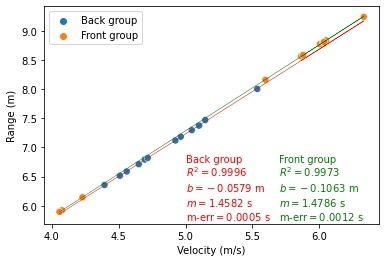

In [27]:
fig = plt.figure()
ax = scatterplot(data=pj_df,x='Velocity',y='Range',hue='File_name',s=50)

X = pj.pj_data.iloc[:, 2].values.reshape(-1, 1)
Y = pj.pj_data.iloc[:, 4].values.reshape(-1, 1)
model = LinearRegression()
model.fit(X,Y)

r2 = model.score(X,Y)
y_int = model.intercept_[0]
slope = model.coef_[0][0]
print(r'$R^{2}$:',r2)
print('intercept:', y_int)
print('slope:', slope)

pj_pred = model.predict(X2)
ax.plot(X2,pj_pred,color='red',linestyle='-',linewidth=0.5)
legend_labels, _= ax.get_legend_handles_labels()
print(legend_labels)
ax.legend(legend_labels, ['Back group','Front group'])
ax.set_xlabel('Velocity (m/s)')
ax.set_ylabel('Range (m)')
ax.annotate(r'Back group',(5.,6.75),c='red')
ax.annotate(r'$R^{2} = %0.4f$'%r2,(5.,6.5),c='red')
ax.annotate(r'$b = %0.4f~\mathrm{m}$'%y_int,(5.,6.25),c='red')
ax.annotate(r'$m = %0.4f~\mathrm{s}$'%slope,(5.,6.0),c='red')
ax.annotate(r'm-err$= %0.4f~\mathrm{s}$'%flight_time_err,(5.,5.75),c='red')

X2 = pj2.pj_data.iloc[:, 2].values.reshape(-1, 1)
Y2 = pj2.pj_data.iloc[:, 4].values.reshape(-1, 1)
model2 = LinearRegression()
model2.fit(X2,Y2)

r22 = model.score(X2,Y2)
y_int2 = model2.intercept_[0]
slope2 = model2.coef_[0][0]
print(r'$R^{2}$:',r22)
print('intercept:', y_int2)
print('slope:', slope2)

pj2.pj_data['Range_prediction'] = model2.predict(X2)
ax.plot(X2,pj2.pj_data['Range_prediction'],color='green',linestyle='-',linewidth=0.5)
ax.set_xlabel('Velocity (m/s)')
ax.set_ylabel('Range (m)')
ax.annotate(r'Front group',(5.7,6.75),c='green')
ax.annotate(r'$R^{2} = %0.4f$'%r22,(5.7,6.5),c='green')
ax.annotate(r'$b = %0.4f~\mathrm{m}$'%y_int2,(5.7,6.25),c='green')
ax.annotate(r'$m = %0.4f~\mathrm{s}$'%slope2,(5.7,6.0),c='green')
ax.annotate(r'm-err$= %0.4f~\mathrm{s}$'%flight_time_err2,(5.7,5.75),c='green')
fig.savefig('projectile_motion1.pdf')